In [2]:
import pandas as pd
import os
from scipy.stats import spearmanr
import numpy as np
import argparse
from matplotlib import pyplot as plt
import seaborn as sns

In [46]:
result_dir_l = [f"/home/qcx679/hantang/UAAG2/results/Full_mask_5_virtual_node_mask_token_atomic_only_mask_diffusion_0917_variational_sampling_1130_{i}" for i in range(1, 6)]
model_list = [os.listdir(result_dir) for result_dir in result_dir_l]
model_name_list = [f"UNAAGI-{i}" for i in range(1, 6)]

In [4]:
result_folder = pd.DataFrame({"benchmark_name": [],
                              "model": [],
                              "spearmanr_pred": [],
                              "ndcg_pred": []})

for model_num in range(len(model_list)):
    for benchmark in model_list[model_num]:
        benchmark_name = '_'.join(benchmark.split('_')[:2])
        bm_path = os.path.join(result_dir_l[model_num], benchmark)
        result_df = pd.read_csv(os.path.join(bm_path, "results.csv"))
        for model in ['UNAAGI']:
            spr = result_df[result_df['model'] == model]['spearmanr_pred'].values[0]
            ndcg = result_df[result_df['model'] == model]['ndcg_pred'].values[0]
            result_folder = pd.concat([result_folder, pd.DataFrame({"benchmark_name": [benchmark_name],
                                                                    "model": [f'UNAAGI-{model_num+1}'],
                                                                    "spearmanr_pred": [spr],
                                                            "ndcg_pred": [ndcg]})], ignore_index=True)
        

In [5]:
result_dir_l = [f"/home/qcx679/hantang/UAAG2/results/Full_mask_5_virtual_node_mask_token_atomic_only_mask_diffusion_0917_variational_sampling_1000_{i}" for i in range(3)]
model_list = [os.listdir(result_dir) for result_dir in result_dir_l]
model_name_list = [f"UNAAGI-{i}" for i in range(3)]
result_folder_addition = pd.DataFrame({"benchmark_name": [],
                              "model": [],
                              "spearmanr_pred": [],
                              "ndcg_pred": []})

for model_num in range(len(model_list)):
    for benchmark in model_list[model_num]:
        benchmark_name = '_'.join(benchmark.split('_')[:2])
        bm_path = os.path.join(result_dir_l[model_num], benchmark)
        result_df = pd.read_csv(os.path.join(bm_path, "results.csv"))
        for model in ['UNAAGI']:
            spr = result_df[result_df['model'] == model]['spearmanr_pred'].values[0]
            ndcg = result_df[result_df['model'] == model]['ndcg_pred'].values[0]
            result_folder_addition = pd.concat([result_folder_addition, pd.DataFrame({"benchmark_name": [benchmark_name],
                                                                    "model": [f'UNAAGI-{model_num+1}'],
                                                                    "spearmanr_pred": [spr],
                                                            "ndcg_pred": [ndcg]})], ignore_index=True)
result_folder = pd.concat([result_folder, result_folder_addition], ignore_index=True)

In [6]:
result_folder

,benchmark_name,model,spearmanr_pred,ndcg_pred
0,CCDB_ECOLI,UNAAGI-1,0.214449,0.762951
1,ENVZ_ECOLI,UNAAGI-1,0.052670,0.797856
2,HCP_LAMBD,UNAAGI-1,0.379746,0.853004
3,SUMO1_HUMAN,UNAAGI-1,0.238729,0.704760
4,PKN1_HUMAN,UNAAGI-1,0.349689,0.885123
...,...,...,...,...
110,B2L11_HUMAN,UNAAGI-3,0.229079,0.472149
111,DLG4_RAT,UNAAGI-3,0.190713,0.836316
112,ERBB2_HUMAN,UNAAGI-3,-0.036854,0.853932
113,ENV_HV1B9,UNAAGI-3,0.326612,0.477356


In [27]:
# takke the average and variance of vis by row, and plot the scatter plot over the mean and error bar of variance, by benchmark, ignore NAN
piv_mean = piv.groupby(piv.index)[['UNNAGI-1', 'UNAAGI-2', 'UNAAGI-3', 'UNAAGI-4', 'UNAAGI-5']].mean().reset_index()

KeyError: "Columns not found: 'UNNAGI-1'"

In [28]:
piv_mean = piv.groupby(piv.index)

Index(['A0A247D711_LISMN', 'AICDA_HUMAN', 'ARGR_ECOLI', 'B2L11_HUMAN',
       'CCDB_ECOLI', 'DLG4_RAT', 'DN7A_SACS2', 'ENVZ_ECOLI', 'ENV_HV1B9',
       'ERBB2_HUMAN', 'FKBP3_HUMAN', 'HCP_LAMBD', 'IF1_ECOLI', 'ILF3_HUMAN',
       'OTU7A_HUMAN', 'PKN1_HUMAN', 'RS15_GEOSE', 'SBI_STAAM', 'SCIN_STAAR',
       'SOX30_HUMAN', 'SQSTM_MOUSE', 'SUMO1_HUMAN', 'TAT_HV1BR', 'VG08_BPP22',
       'VRPI_BPT7'],
      dtype='object', name='benchmark_name')

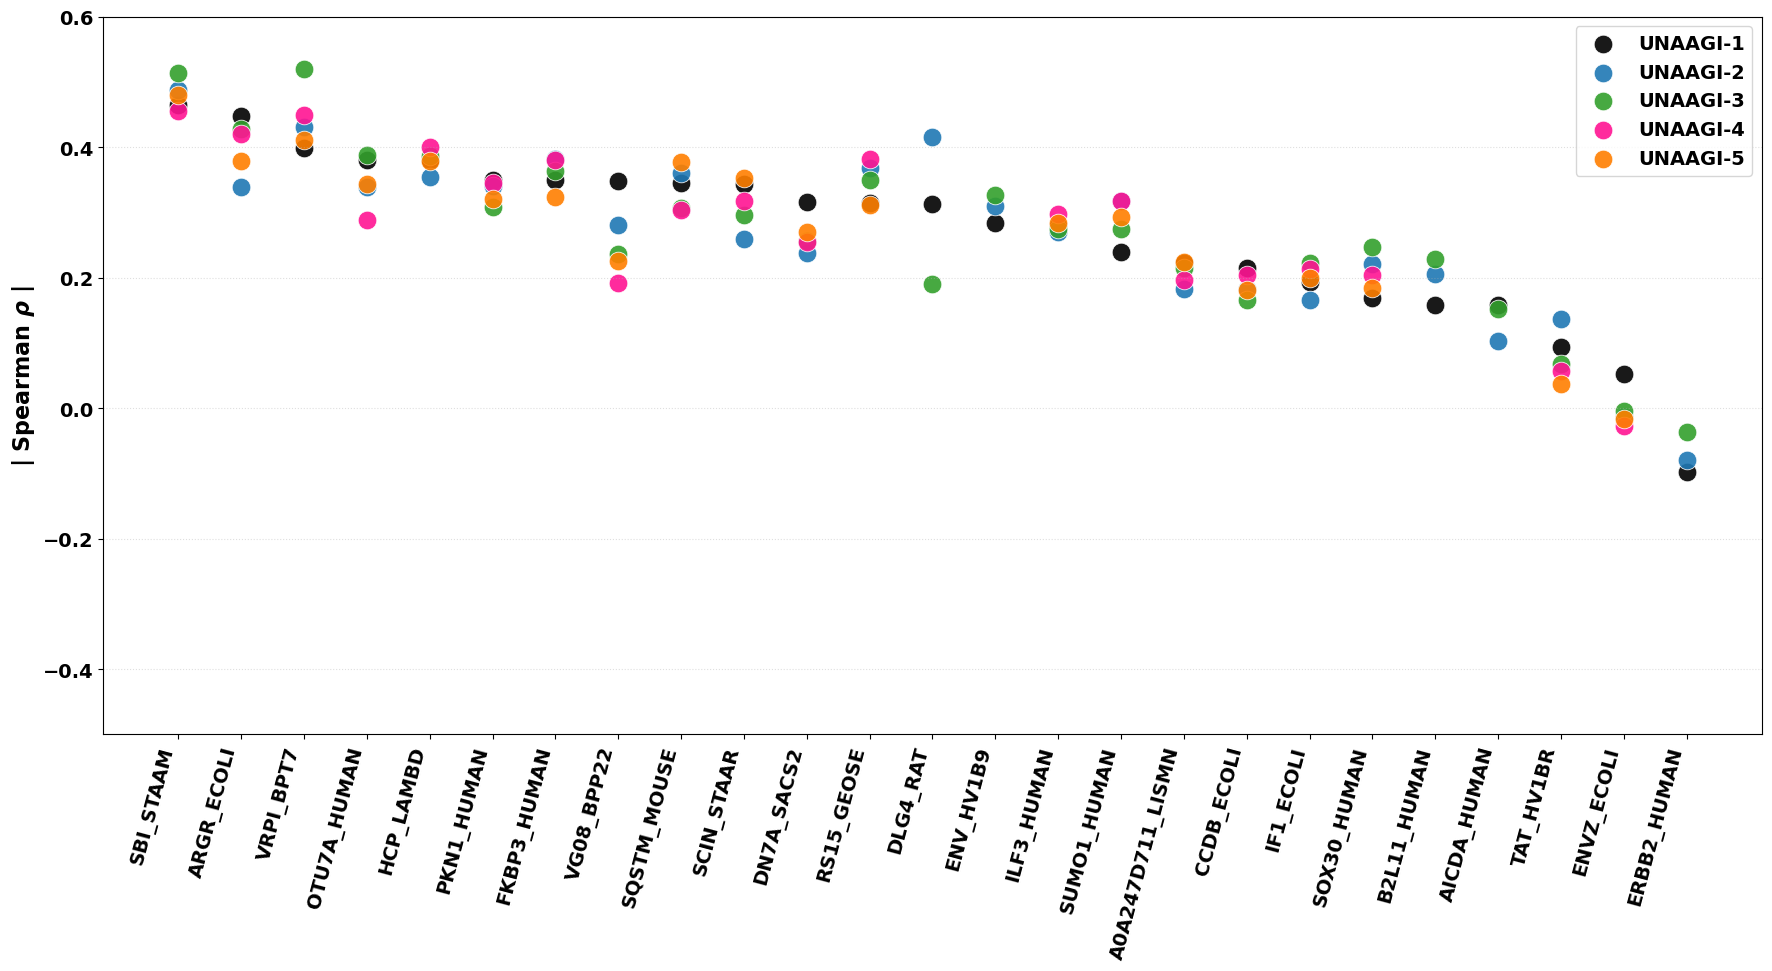

In [7]:

# --- 2) Choose which models to show (3 looks clean like your example) ---
# Put your preferred models here (order = legend order):
models_to_plot = [
    f"UNAAGI-{i}" for i in range(1, 6)
]
colors = {
    "UNAAGI-1": "black",     # black
    "UNAAGI-2": "#1f78b4",             # dark blue
    "UNAAGI-3": "#33a02c",                 # dark green
    "UNAAGI-4": "#ff1493",                  # bright red (highlight)
    "UNAAGI-5": "#ff7f00",          # orange
    "Progen2_large": "#6a3d9a",           # purple
    "ESM-IF1": "#666666",
    "UNAAGI-1025": "#00CED1",          # dark turquoise
}


# --- 3) Build a pivot table (rows = benchmark, cols = model) ---
piv = result_folder.pivot_table(index="benchmark_name",
                     columns="model",
                     values="spearmanr_pred")

# Keep only selected models (drop any that are missing):
models_to_plot = [m for m in models_to_plot if m in piv.columns]
assert len(models_to_plot) > 0, "None of the chosen models are present in the data."

# --- 4) Sort benchmarks by the reference model (first in models_to_plot) descending ---
ref_model = models_to_plot[0]
piv_sorted = piv.sort_values(by=ref_model, ascending=False)

benchmarks = piv_sorted.index.tolist()
x = np.arange(len(benchmarks))

# --- 5) Make the plot: aligned dots on the same x for each benchmark ---
plt.rcParams.update({
    "font.size": 16,       # larger text everywhere
    "font.weight": "bold", # bold text
    "axes.labelweight": "bold",
    "axes.titlesize": 15,  # even larger title
    "axes.titleweight": "bold",
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
})
plt.figure(figsize=(18, 10))

for m in models_to_plot:
    # if m == ref_model:
    #     y = piv_sorted[m].values
    #     plt.scatter(
    #         x, y, marker="*",
    #         s=220,
    #         alpha=0.9,
    #         label=m,
    #         edgecolor="black",
    #         linewidth=1.2,
    #         color=colors.get(m, None)  # fallback to Matplotlib default if not specified
    #     )
    # else:
    y = piv_sorted[m].values
    plt.scatter(
        x, y,
        s=180,
        alpha=0.9,
        label=m,
        edgecolor="white",
        linewidth=0.6,
        color=colors.get(m, None)  # fallback to Matplotlib default if not specified
    )

# --- 6) Cosmetics like the example ---
plt.xticks(x, benchmarks, rotation=75, ha="right")
plt.ylabel(r"| Spearman $\rho$ |")
plt.ylim(-0.5, 0.6)  # adjust if you like
plt.grid(axis="y", linestyle=":", alpha=0.4)
plt.legend(title="", frameon=True, loc="upper right")
plt.tight_layout()
# Save as high-resolution SVG
# plt.savefig("UNAAGI_proteingym_atomic.svg", format="svg", dpi=300)
plt.show()


In [38]:
# Calculate mean and variance for the proteingym results (5 parallel runs)
# Filter for only UNAAGI-1 through UNAAGI-5 models
proteingym_models = [f"UNAAGI-{i}" for i in range(1, 6)]

# Create pivot table
piv = result_folder.pivot_table(index="benchmark_name",
                                 columns="model",
                                 values="spearmanr_pred")

# Select only the 5 parallel runs
piv_subset = piv[[col for col in proteingym_models if col in piv.columns]]

# Calculate mean and standard deviation (variance) across the 5 runs for each benchmark
mean_by_benchmark = piv_subset.mean(axis=1)
std_by_benchmark = piv_subset.std(axis=1)

# Create a summary dataframe
summary_df = pd.DataFrame({
    'benchmark': mean_by_benchmark.index,
    'mean_spearman': mean_by_benchmark.values,
    'std_spearman': std_by_benchmark.values
})

# Sort by mean descending
summary_df = summary_df.sort_values('mean_spearman', ascending=False).reset_index(drop=True)

print("Summary statistics for proteingym results (5 parallel runs):")
print(summary_df)

Summary statistics for proteingym results (5 parallel runs):
           benchmark  mean_spearman  std_spearman
0          SBI_STAAM       0.479884      0.022438
1          VRPI_BPT7       0.441463      0.047622
2         ARGR_ECOLI       0.402369      0.043457
3          HCP_LAMBD       0.379733      0.016270
4        FKBP3_HUMAN       0.359765      0.024072
5        OTU7A_HUMAN       0.347645      0.039926
6         RS15_GEOSE       0.344922      0.031952
7        SQSTM_MOUSE       0.338753      0.032470
8         PKN1_HUMAN       0.332474      0.017938
9         SCIN_STAAR       0.313547      0.037658
10         ENV_HV1B9       0.306814      0.021297
11          DLG4_RAT       0.306414      0.112439
12       SUMO1_HUMAN       0.287938      0.032945
13        ILF3_HUMAN       0.281019      0.010553
14        DN7A_SACS2       0.267145      0.029639
15        VG08_BPP22       0.256093      0.060167
16  A0A247D711_LISMN       0.207732      0.017853
17       SOX30_HUMAN       0.204512    

In [58]:
# Extract baseline model data from the first run (baselines are same across all runs)
# Read the first result directory to get baseline models
baseline_folder = pd.DataFrame({"benchmark_name": [],
                                "model": [],
                                "spearmanr_pred": []})

# Use the first run to extract baseline data
first_run_dir = result_dir_l[0]
benchmarks_in_first_run = os.listdir(first_run_dir)
second_run_dir = "/home/qcx679/hantang/UAAG2/results/Full_mask_5_virtual_node_mask_token_atomic_only_mask_diffusion_0917_variational_sampling_1000_0"
benchmarks_in_second_run = os.listdir(second_run_dir)

for benchmark in benchmarks_in_first_run:
    benchmark_name = '_'.join(benchmark.split('_')[:2])
    bm_path = os.path.join(first_run_dir, benchmark)
    result_df = pd.read_csv(os.path.join(bm_path, "results.csv"))
    
    # Get all baseline models (exclude UNAAGI)
    baseline_models = result_df[result_df['model'] != 'UNAAGI']['model'].tolist()
    
    for baseline_model in baseline_models:
        spr = result_df[result_df['model'] == baseline_model]['spearmanr_pred'].values[0]
        baseline_folder = pd.concat([baseline_folder, pd.DataFrame({
            "benchmark_name": [benchmark_name],
            "model": [baseline_model],
            "spearmanr_pred": [spr]
        })], ignore_index=True)
        
for benchmark in benchmarks_in_second_run:
    benchmark_name = '_'.join(benchmark.split('_')[:2])
    bm_path = os.path.join(second_run_dir, benchmark)
    result_df = pd.read_csv(os.path.join(bm_path, "results.csv"))
    
    # Get all baseline models (exclude UNAAGI)
    baseline_models = result_df[result_df['model'] != 'UNAAGI']['model'].tolist()
    
    for baseline_model in baseline_models:
        spr = result_df[result_df['model'] == baseline_model]['spearmanr_pred'].values[0]
        baseline_folder = pd.concat([baseline_folder, pd.DataFrame({
            "benchmark_name": [benchmark_name],
            "model": [baseline_model],
            "spearmanr_pred": [spr]
        })], ignore_index=True)

# Get unique baseline models and randomly select 5
unique_baselines = baseline_folder['model'].unique()
np.random.seed(42)  # For reproducibility
# selected_baselines = np.random.choice(unique_baselines, size=min(5, len(unique_baselines)), replace=False)
selected_baselines = ['MSA_Transformer_ensemble', 'ESM2_15B', 'MSA_Transformer_ensemble', 'Progen2_xlarge', 'ProtGPT2', 'Tranception_L', 'MIFST', 'ESM-IF1', 'ProteinMPNN']
print(f"Selected baselines: {selected_baselines}")

Selected baselines: ['MSA_Transformer_ensemble', 'ESM2_15B', 'MSA_Transformer_ensemble', 'Progen2_xlarge', 'ProtGPT2', 'Tranception_L', 'MIFST', 'ESM-IF1', 'ProteinMPNN']


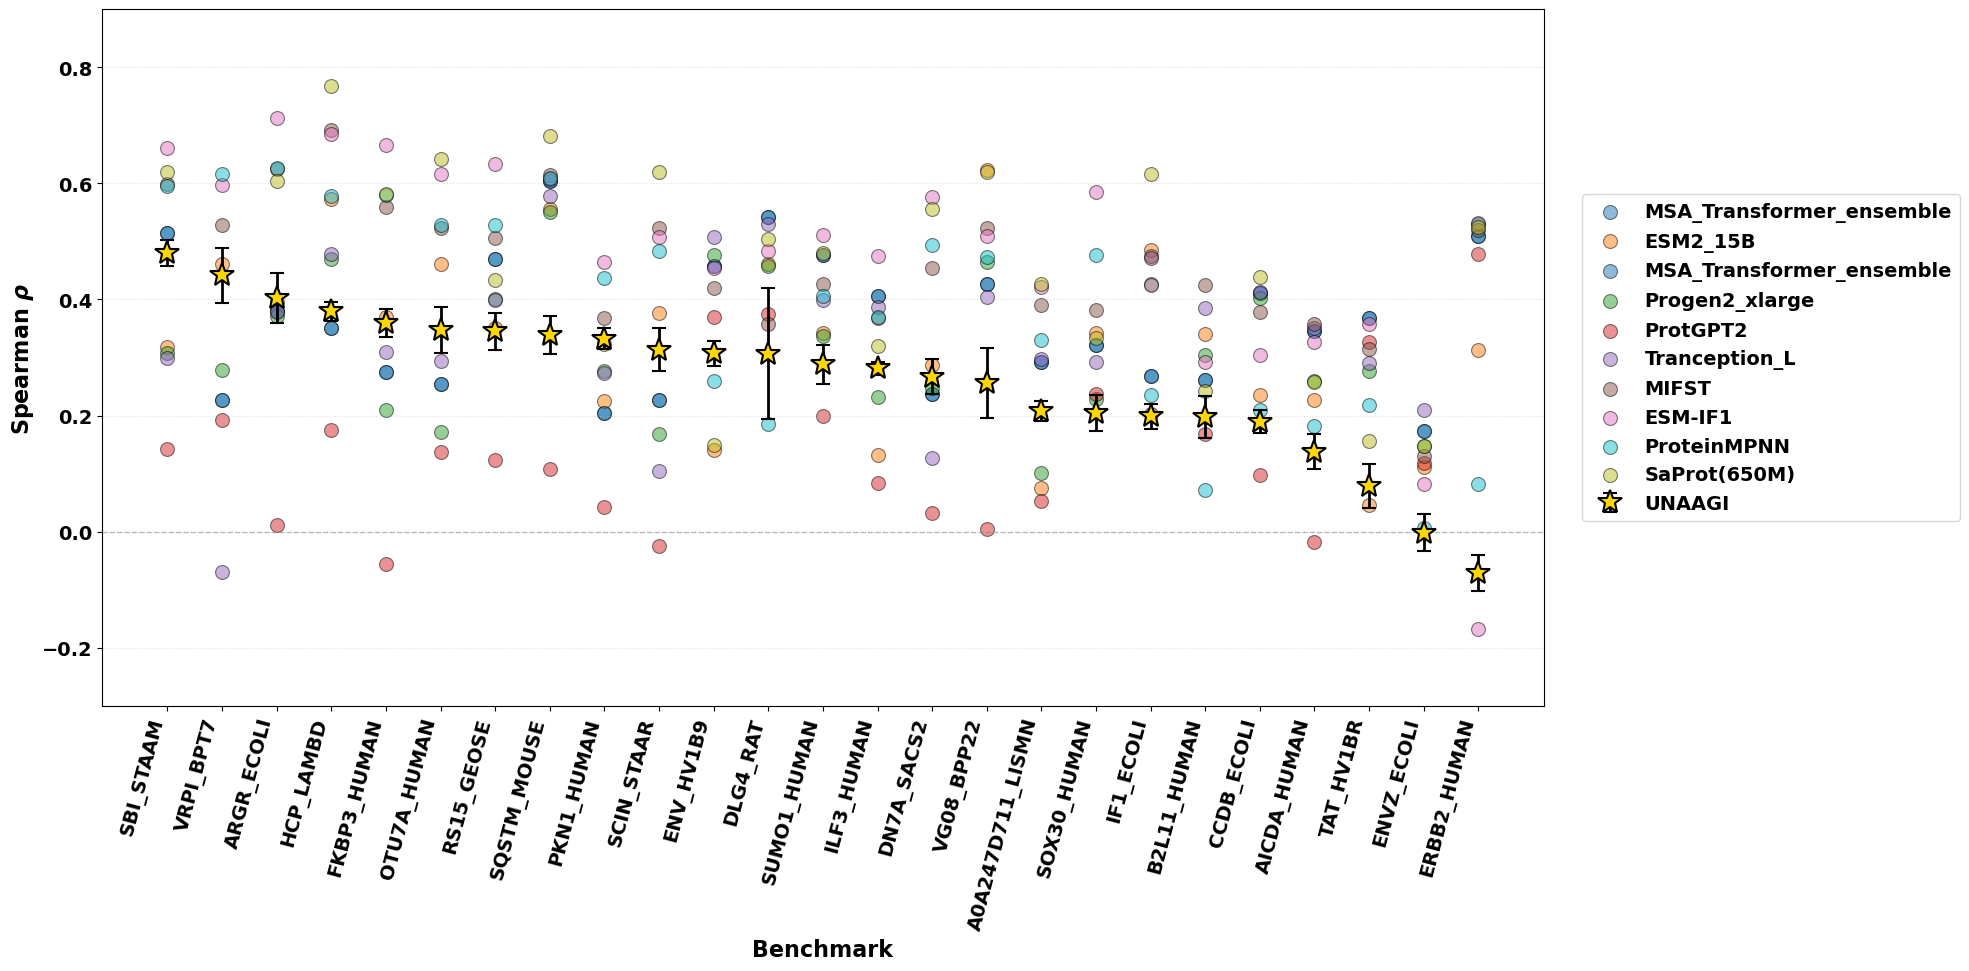


Overall Statistics:
Mean Spearman (across all benchmarks): 0.2635
Median Spearman: 0.2879
Average Std Dev: 0.0335
Max Std Dev: 0.1124
Min Std Dev: 0.0106


In [64]:
# Plot dot plot with error bars (vertical lines showing std dev)
plt.rcParams.update({
    "font.size": 16,       # larger text everywhere
    "font.weight": "bold", # bold text
    "axes.labelweight": "bold",
    "axes.titlesize": 15,  # even larger title
    "axes.titleweight": "bold",
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
})

fig, ax = plt.subplots(figsize=(20, 10))

# Create x positions for each benchmark
x_pos = np.arange(len(summary_df))

# Define highly distinguishable colors for each selected baseline
# Using distinct, vibrant colors that stand out from each other
baseline_color_map = {
    'MSA_Transformer_ensemble': '#1f77b4',  # blue
    'ESM2_15B': '#ff7f0e',                  # orange
    'Progen2_xlarge': '#2ca02c',            # green
    'ProtGPT2': '#d62728',                  # red
    'Tranception_L': '#9467bd',             # purple
    'MIFST': '#8c564b',                     # brown
    'ESM-IF1': '#e377c2',                   # pink
    'ProteinMPNN': '#17becf',               # cyan
    'SaProt(650M)': '#bcbd22',              # yellow-green (distinct from gold UNAAGI)
}

# Plot baseline models first (so they appear behind UNAAGI)
for idx, baseline_model in enumerate(selected_baselines):
    baseline_data = baseline_folder[baseline_folder['model'] == baseline_model]
    # Create a pivot to align with summary_df benchmarks
    baseline_pivot = baseline_data.set_index('benchmark_name')['spearmanr_pred']
    # Reindex to match summary_df order
    baseline_values = baseline_pivot.reindex(summary_df['benchmark']).values
    
    ax.scatter(x_pos, baseline_values,
               s=100,
               alpha=0.5,  # transparent
               color=baseline_color_map.get(baseline_model, '#999999'),  # fallback to gray
               edgecolor='black',
               linewidth=0.8,
               label=baseline_model,
               zorder=1)  # lower z-order to appear behind

# Plot SaProt(650M) from the dictionary
saprot_values = [saprot.get(bench, np.nan) for bench in summary_df['benchmark']]
ax.scatter(x_pos, saprot_values,
           s=100,
           alpha=0.5,
           color=baseline_color_map['SaProt(650M)'],
           edgecolor='black',
           linewidth=0.8,
           label='SaProt(650M)',
           zorder=1)

# Plot UNAAGI with error bars on top
ax.errorbar(x_pos, summary_df['mean_spearman'], 
            yerr=summary_df['std_spearman'],
            fmt='*',  # asterisk/star markers
            markersize=18,
            color='#FFD700',  # bright gold/yellow color (shining)
            ecolor='black',   # error bar color
            elinewidth=2,     # error bar line width
            capsize=5,        # cap width at the end of error bars
            capthick=2,       # cap thickness
            alpha=1.0,
            markeredgecolor='black',  # black stroke around stars
            markeredgewidth=1.5,      # thicker black edge
            label='UNAAGI',
            zorder=2)  # higher z-order to appear on top

# Customize plot
ax.set_xlabel('Benchmark', fontweight='bold', fontsize=16)
ax.set_ylabel(r'Spearman $\rho$', fontweight='bold', fontsize=16)
ax.set_xticks(x_pos)
ax.set_xticklabels(summary_df['benchmark'], rotation=75, ha='right')
ax.grid(axis='y', linestyle=':', alpha=0.4)
ax.set_ylim(-0.3, 0.9)

# Add horizontal line at y=0
ax.axhline(y=0, color='gray', linestyle='--', linewidth=1, alpha=0.5)

# Move legend outside the plot area (to the right)
plt.legend(frameon=True, loc='center left', bbox_to_anchor=(1.02, 0.5))
plt.tight_layout()
# plt.savefig("proteingym_mean_variance_dots.svg", format="svg", dpi=300, bbox_inches='tight')
plt.show()

# Print summary statistics
print(f"\nOverall Statistics:")
print(f"Mean Spearman (across all benchmarks): {summary_df['mean_spearman'].mean():.4f}")
print(f"Median Spearman: {summary_df['mean_spearman'].median():.4f}")
print(f"Average Std Dev: {summary_df['std_spearman'].mean():.4f}")
print(f"Max Std Dev: {summary_df['std_spearman'].max():.4f}")
print(f"Min Std Dev: {summary_df['std_spearman'].min():.4f}")

In [60]:
summary_df

,benchmark,mean_spearman,std_spearman
0,SBI_STAAM,0.479884,0.022438
1,VRPI_BPT7,0.441463,0.047622
2,ARGR_ECOLI,0.402369,0.043457
3,HCP_LAMBD,0.379733,0.016270
4,FKBP3_HUMAN,0.359765,0.024072
5,OTU7A_HUMAN,0.347645,0.039926
6,RS15_GEOSE,0.344922,0.031952
7,SQSTM_MOUSE,0.338753,0.032470
8,PKN1_HUMAN,0.332474,0.017938
9,SCIN_STAAR,0.313547,0.037658


In [63]:
saprot = {
"SBI_STAAM": 0.62,
"VRPI_BPT73": 0.662,
"ARGR_ECOLI": 0.604,
"HCP_LAMBD": 0.768,
"FKBP3_HUMAN": 0.581,
"OTU7A_HUMAN": 0.642,
"RS15_GEOSE": 0.433,
"SQSTM_MOUSE": 0.682,
"PKN1_HUMAN": 0.324,
"SCIN_STAAR": 0.62,
"ENV_HV1B9": 0.15,
"DLG4_RAT": 0.504,
"SUMO1_HUMAN": 0.479,
"ILF3_HUMAN": 0.319,
"DN7A_SACS2": 0.556,
"VG08_BPP22": 0.619,
"A0A247D711_LISMN": 0.427,
"SOX30_HUMAN": 0.333,
"IF1_ECOLI": 0.616,
"B2L11_HUMAN": 0.242,
"CCDB_ECOLI": 0.438,
"AICDA_HUMAN": 0.257,
"TAT_HV1BR": 0.157,
"ENVZ_ECOLI": 0.148,
"ERBB2_HUMAN": 0.525
}

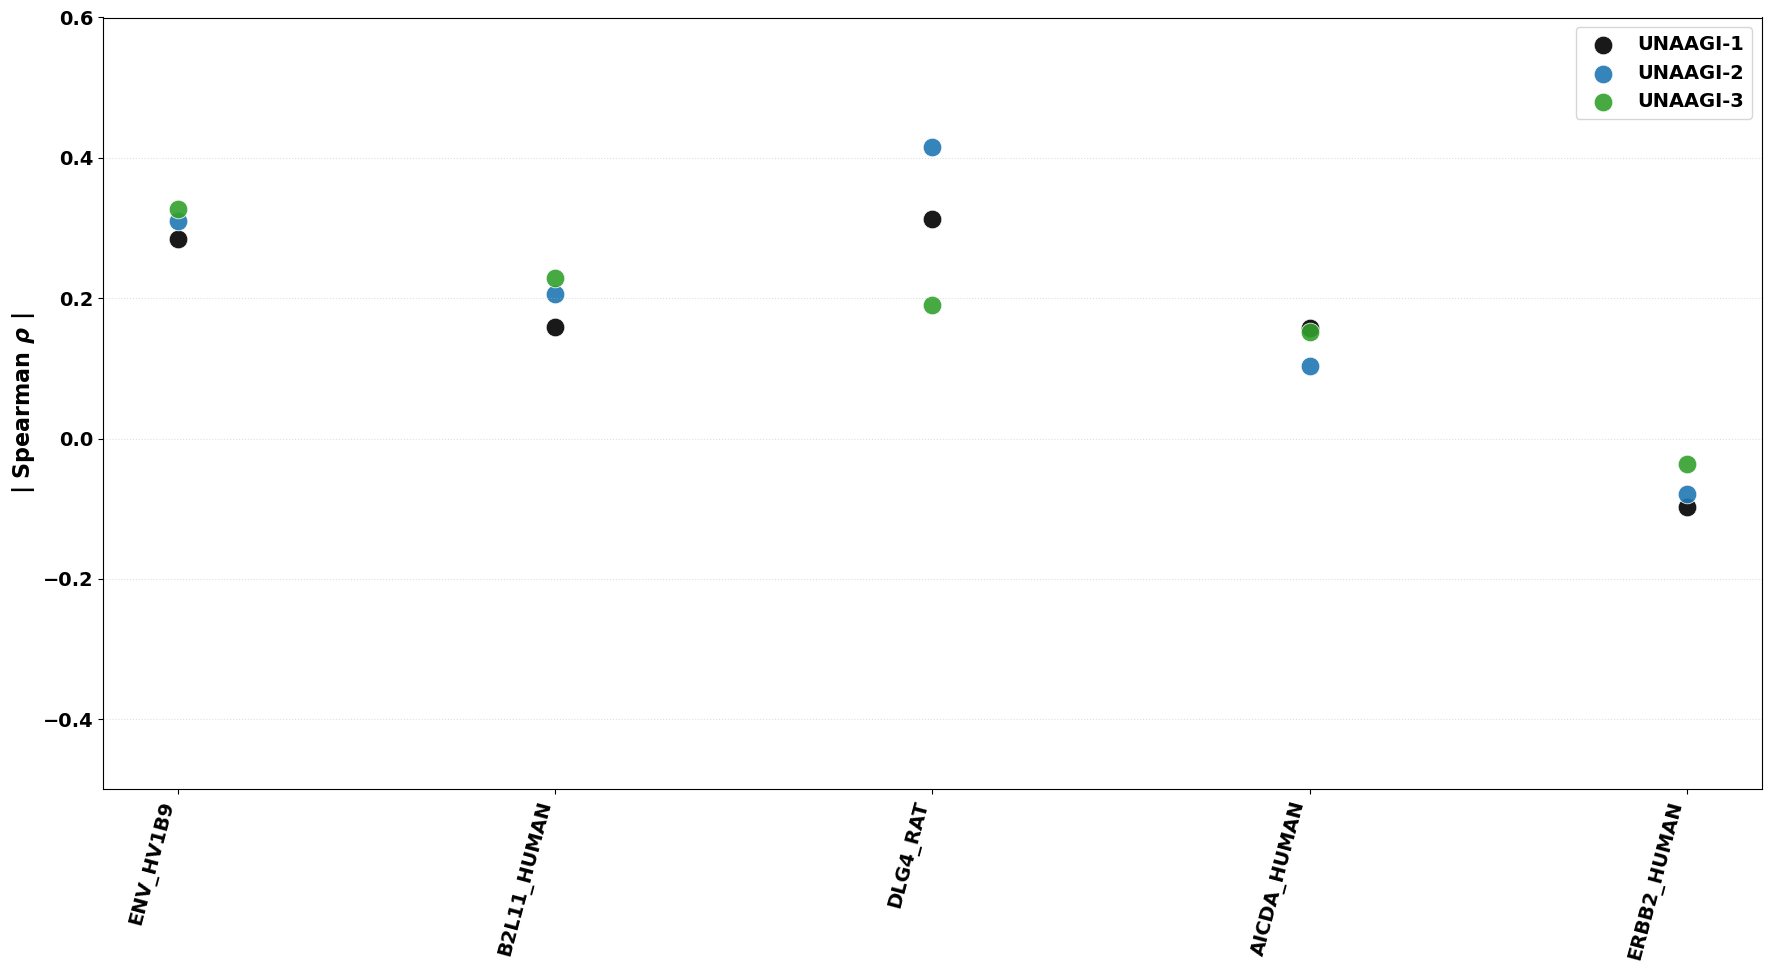

In [13]:

# --- 2) Choose which models to show (3 looks clean like your example) ---
# Put your preferred models here (order = legend order):
models_to_plot = [
    f"UNAAGI-{i}" for i in range(4)
]
colors = {
    "UNAAGI-1": "black",     # black
    "UNAAGI-2": "#1f78b4",             # dark blue
    "UNAAGI-3": "#33a02c",                 # dark green
    "UNAAGI-0": "#ff1493",                  # bright red (highlight)
    "UNAAGI-5": "#ff7f00",          # orange
    "Progen2_large": "#6a3d9a",           # purple
    "ESM-IF1": "#666666",
    "UNAAGI-1025": "#00CED1",          # dark turquoise
}


# --- 3) Build a pivot table (rows = benchmark, cols = model) ---
piv = result_folder.pivot_table(index="benchmark_name",
                     columns="model",
                     values="spearmanr_pred")

# Keep only selected models (drop any that are missing):
models_to_plot = [m for m in models_to_plot if m in piv.columns]
assert len(models_to_plot) > 0, "None of the chosen models are present in the data."

# --- 4) Sort benchmarks by the reference model (first in models_to_plot) descending ---
ref_model = models_to_plot[-1]
piv_sorted = piv.sort_values(by=ref_model, ascending=False)

benchmarks = piv_sorted.index.tolist()
x = np.arange(len(benchmarks))

# --- 5) Make the plot: aligned dots on the same x for each benchmark ---
plt.rcParams.update({
    "font.size": 16,       # larger text everywhere
    "font.weight": "bold", # bold text
    "axes.labelweight": "bold",
    "axes.titlesize": 15,  # even larger title
    "axes.titleweight": "bold",
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
})
plt.figure(figsize=(18, 10))

for m in models_to_plot:
    # if m == ref_model:
    #     y = piv_sorted[m].values
    #     plt.scatter(
    #         x, y, marker="*",
    #         s=220,
    #         alpha=0.9,
    #         label=m,
    #         edgecolor="black",
    #         linewidth=1.2,
    #         color=colors.get(m, None)  # fallback to Matplotlib default if not specified
    #     )
    # else:
    y = piv_sorted[m].values
    plt.scatter(
        x, y,
        s=180,
        alpha=0.9,
        label=m,
        edgecolor="white",
        linewidth=0.6,
        color=colors.get(m, None)  # fallback to Matplotlib default if not specified
    )

# --- 6) Cosmetics like the example ---
plt.xticks(x, benchmarks, rotation=75, ha="right")
plt.ylabel(r"| Spearman $\rho$ |")
plt.ylim(-0.5, 0.6)  # adjust if you like
plt.grid(axis="y", linestyle=":", alpha=0.4)
plt.legend(title="", frameon=True, loc="upper right")
plt.tight_layout()
# Save as high-resolution SVG
# plt.savefig("UNAAGI_proteingym_atomic.svg", format="svg", dpi=300)
plt.show()


In [8]:
result_dir_cp2 = [f"/home/qcx679/hantang/UAAG2/results/CP2_Full_mask_5_virtual_node_mask_token_atomic_only_mask_diffusion_absorb_state_0917_variational_sampling_1000_1126_{i}" for i in range(10)]
# result_dir_puma = [f"/home/qcx679/hantang/UAAG2/results/PUMA_Full_mask_5_virtual_node_mask_token_atomic_only_mask_diffusion_normalized_prior_0915_variational_sampling_1000_{i}" for i in range(10)]
result_folder = pd.DataFrame({"benchmark_name": [],
                              "model": [],
                              "spearmanr_pred": [],
                        })
model_name_list = [f"UNAAGI-{i}" for i in range(10)]
for model_num in range(len(model_name_list)):
    for benchmark_name in ['CP2', 'CP_NAA', 'CP_NCAA']:
        if benchmark_name == 'CP2':
            bm_path = result_dir_cp2[model_num]
            result_df = pd.read_csv(os.path.join(bm_path, "all_benchmark_results.csv"))
        elif benchmark_name == 'PUMA':
            bm_path = result_dir_puma[model_num]
            result_df = pd.read_csv(os.path.join(bm_path, "all_benchmark_results.csv"))
        elif benchmark_name == 'CP_NCAA':
            bm_path = result_dir_cp2[model_num]
            result_df = pd.read_csv(os.path.join(bm_path, "uaa_benchmark_results.csv"))
        elif benchmark_name == 'CP_NAA':
            bm_path = result_dir_cp2[model_num]
            result_df = pd.read_csv(os.path.join(bm_path, "naa_benchmark_results.csv"))
        elif benchmark_name == 'PUMA_NCAA':
            bm_path = result_dir_puma[model_num]
            result_df = pd.read_csv(os.path.join(bm_path, "uaa_benchmark_results.csv"))

        for model in ['UNAAGI']:
            spr = spearmanr(result_df['value'], result_df['pred']).correlation
            # ndcg = result_df[result_df['model'] == model]['ndcg_pred'].values[0]
            result_folder = pd.concat([result_folder, pd.DataFrame({"benchmark_name": [benchmark_name],
                                                                    "model": [f'UNAAGI-{model_num+1}'],
                                                                    "spearmanr_pred": [spr],
                                                            })], ignore_index=True)
        


In [9]:
result_folder

,benchmark_name,model,spearmanr_pred
0,CP2,UNAAGI-1,0.089194
1,CP_NAA,UNAAGI-1,0.230422
2,CP_NCAA,UNAAGI-1,0.146161
3,CP2,UNAAGI-2,0.146928
4,CP_NAA,UNAAGI-2,0.254541
5,CP_NCAA,UNAAGI-2,0.300808
6,CP2,UNAAGI-3,0.162870
7,CP_NAA,UNAAGI-3,0.280583
8,CP_NCAA,UNAAGI-3,0.291373
9,CP2,UNAAGI-4,0.059814


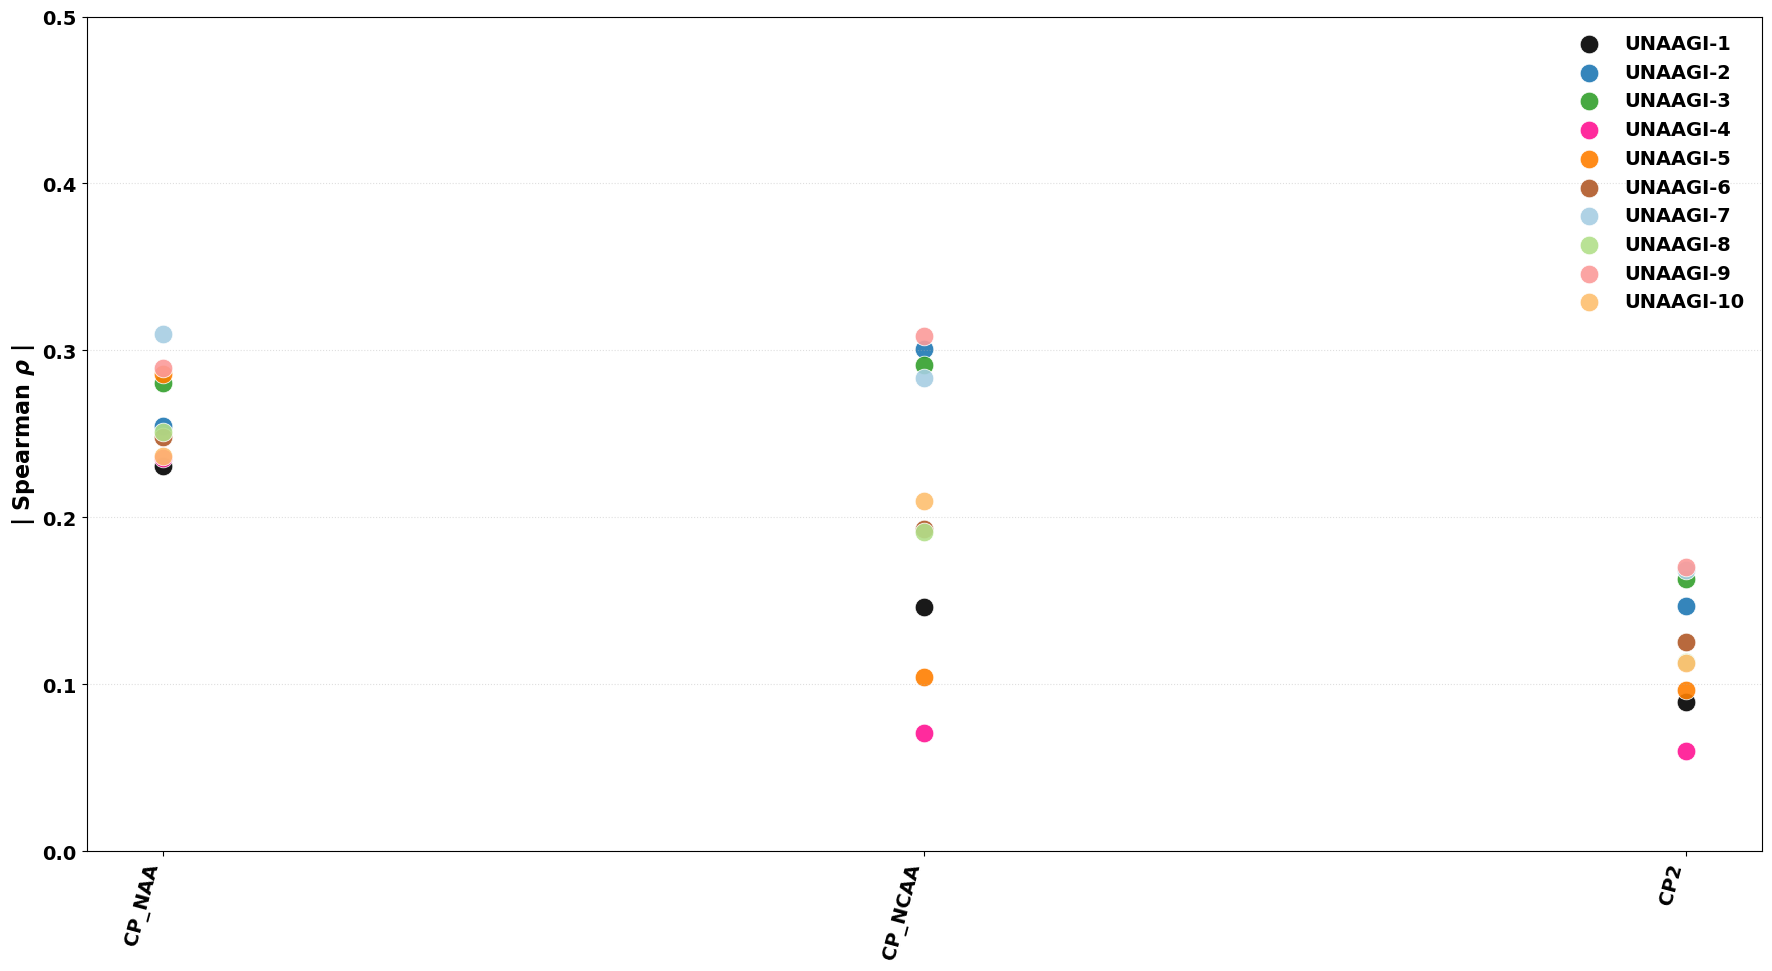

In [10]:

# --- 2) Choose which models to show (3 looks clean like your example) ---
# Put your preferred models here (order = legend order):
models_to_plot = [
    f"UNAAGI-{i}" for i in range(1, 10+1)
]
colors = {
    "UNAAGI-1": "black",     # black
    "UNAAGI-2": "#1f78b4",             # dark blue
    "UNAAGI-3": "#33a02c",                 # dark green
    "UNAAGI-4": "#ff1493",                  # bright red (highlight)
    "UNAAGI-5": "#ff7f00",          # orange
    "UNAAGI-6": "#b15928",          # brown
    "UNAAGI-7": "#a6cee3",          # light blue
    "UNAAGI-8": "#b2df8a",          # light green
    "UNAAGI-9": "#fb9a99",          # light red
    "UNAAGI-10": "#fdbf6f",         # light orange
    "Progen2_large": "#6a3d9a",           # purple
    "ESM-IF1": "#666666",
    "UNAAGI-1025": "#00CED1",          # dark turquoise
}


# --- 3) Build a pivot table (rows = benchmark, cols = model) ---
piv = result_folder.pivot_table(index="benchmark_name",
                     columns="model",
                     values="spearmanr_pred")

# Keep only selected models (drop any that are missing):
models_to_plot = [m for m in models_to_plot if m in piv.columns]
assert len(models_to_plot) > 0, "None of the chosen models are present in the data."

# --- 4) Sort benchmarks by the reference model (first in models_to_plot) descending ---
ref_model = models_to_plot[-1]
piv_sorted = piv.sort_values(by=ref_model, ascending=False)

benchmarks = piv_sorted.index.tolist()
x = np.arange(len(benchmarks))

# --- 5) Make the plot: aligned dots on the same x for each benchmark ---
plt.rcParams.update({
    "font.size": 16,       # larger text everywhere
    "font.weight": "bold", # bold text
    "axes.labelweight": "bold",
    "axes.titlesize": 15,  # even larger title
    "axes.titleweight": "bold",
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
})
plt.figure(figsize=(18, 10))

for m in models_to_plot:
    # if m == ref_model:
    #     y = piv_sorted[m].values
    #     plt.scatter(
    #         x, y, marker="*",
    #         s=220,
    #         alpha=0.9,
    #         label=m,
    #         edgecolor="black",
    #         linewidth=1.2,
    #         color=colors.get(m, None)  # fallback to Matplotlib default if not specified
    #     )
    # else:
    y = piv_sorted[m].values
    plt.scatter(
        x, y,
        s=180,
        alpha=0.9,
        label=m,
        edgecolor="white",
        linewidth=0.6,
        color=colors.get(m, None)  # fallback to Matplotlib default if not specified
    )

# --- 6) Cosmetics like the example ---
plt.xticks(x, benchmarks, rotation=75, ha="right")
plt.ylabel(r"| Spearman $\rho$ |")
plt.ylim(-0.00, 0.5)  # adjust if you like
plt.grid(axis="y", linestyle=":", alpha=0.4)
# put the legend outside
plt.legend(title="", frameon=False, loc="upper right")
plt.tight_layout()
# Save as high-resolution SVG
# plt.savefig("UNAAGI_proteingym_atomic.svg", format="svg", dpi=300)
plt.show()


In [5]:
result_dir_puma = [f"/home/qcx679/hantang/UAAG2/results/PUMA_Full_mask_5_virtual_node_mask_token_atomic_only_mask_diffusion_normalized_prior_0915_variational_sampling_1127_1000_{i}" for i in range(5)]
# result_dir_puma = [f"/home/qcx679/hantang/UAAG2/results/PUMA_Full_mask_5_virtual_node_mask_token_atomic_only_mask_diffusion_normalized_prior_0915_variational_sampling_1000_{i}" for i in range(10)]
result_folder = pd.DataFrame({"benchmark_name": [],
                              "model": [],
                              "spearmanr_pred": [],
                        })
model_name_list = [f"UNAAGI-{i}" for i in range(5)]
for model_num in range(len(model_name_list)):
    for benchmark_name in ['PUMA', 'PUMA_NAA', 'PUMA_NCAA']:
        
        if benchmark_name == 'PUMA':
            bm_path = result_dir_puma[model_num]
            result_df = pd.read_csv(os.path.join(bm_path, "all_benchmark_results.csv"))
        elif benchmark_name == 'PUMA_NCAA':
            bm_path = result_dir_puma[model_num]
            result_df = pd.read_csv(os.path.join(bm_path, "uaa_benchmark_results.csv"))
        elif benchmark_name == 'PUMA_NAA':
            bm_path = result_dir_puma[model_num]
            result_df = pd.read_csv(os.path.join(bm_path, "naa_benchmark_results.csv"))

        for model in ['UNAAGI']:
            spr = spearmanr(result_df['value'], result_df['pred']).correlation
            # ndcg = result_df[result_df['model'] == model]['ndcg_pred'].values[0]
            result_folder = pd.concat([result_folder, pd.DataFrame({"benchmark_name": [benchmark_name],
                                                                    "model": [f'UNAAGI-{model_num+1}'],
                                                                    "spearmanr_pred": [spr],
                                                            })], ignore_index=True)
        


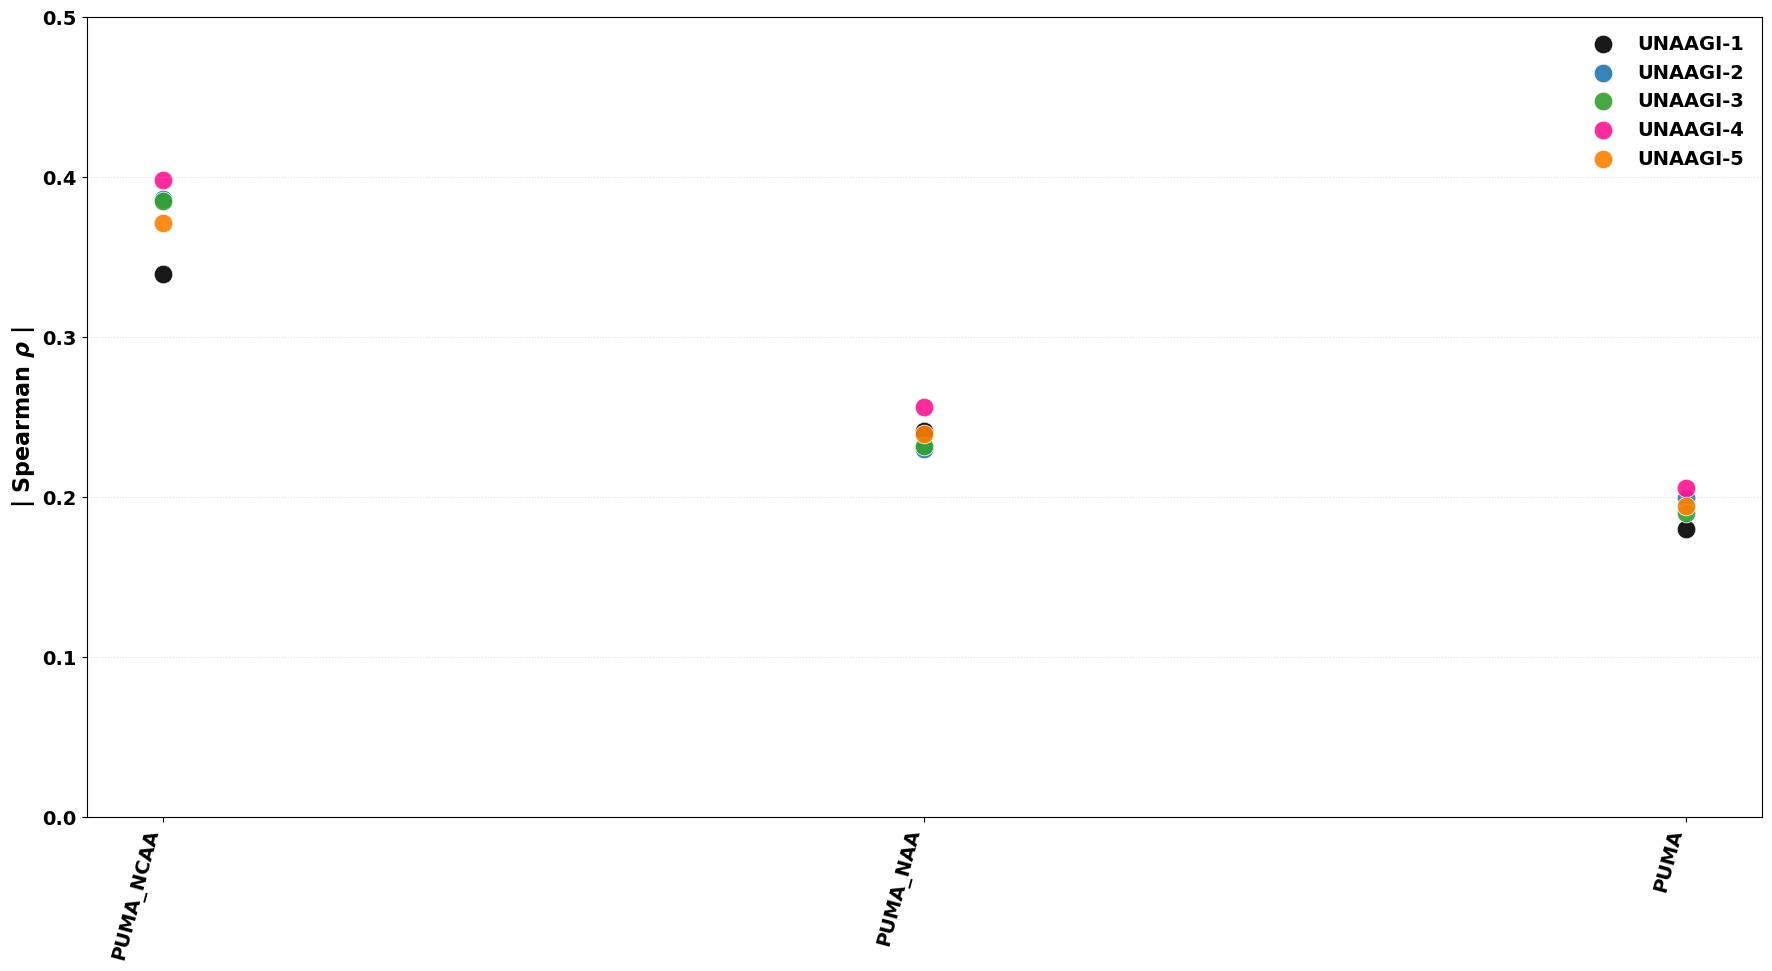

In [6]:

# --- 2) Choose which models to show (3 looks clean like your example) ---
# Put your preferred models here (order = legend order):
models_to_plot = [
    f"UNAAGI-{i}" for i in range(1, 5+1)
]
colors = {
    "UNAAGI-1": "black",     # black
    "UNAAGI-2": "#1f78b4",             # dark blue
    "UNAAGI-3": "#33a02c",                 # dark green
    "UNAAGI-4": "#ff1493",                  # bright red (highlight)
    "UNAAGI-5": "#ff7f00",          # orange
    "UNAAGI-6": "#b15928",          # brown
    "UNAAGI-7": "#a6cee3",          # light blue
    "UNAAGI-8": "#b2df8a",          # light green
    "UNAAGI-9": "#fb9a99",          # light red
    "UNAAGI-10": "#fdbf6f",         # light orange
    "Progen2_large": "#6a3d9a",           # purple
    "ESM-IF1": "#666666",
    "UNAAGI-1025": "#00CED1",          # dark turquoise
}


# --- 3) Build a pivot table (rows = benchmark, cols = model) ---
piv = result_folder.pivot_table(index="benchmark_name",
                     columns="model",
                     values="spearmanr_pred")

# Keep only selected models (drop any that are missing):
models_to_plot = [m for m in models_to_plot if m in piv.columns]
assert len(models_to_plot) > 0, "None of the chosen models are present in the data."

# --- 4) Sort benchmarks by the reference model (first in models_to_plot) descending ---
ref_model = models_to_plot[-1]
piv_sorted = piv.sort_values(by=ref_model, ascending=False)

benchmarks = piv_sorted.index.tolist()
x = np.arange(len(benchmarks))

# --- 5) Make the plot: aligned dots on the same x for each benchmark ---
plt.rcParams.update({
    "font.size": 16,       # larger text everywhere
    "font.weight": "bold", # bold text
    "axes.labelweight": "bold",
    "axes.titlesize": 15,  # even larger title
    "axes.titleweight": "bold",
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
})
plt.figure(figsize=(18, 10))

for m in models_to_plot:
    # if m == ref_model:
    #     y = piv_sorted[m].values
    #     plt.scatter(
    #         x, y, marker="*",
    #         s=220,
    #         alpha=0.9,
    #         label=m,
    #         edgecolor="black",
    #         linewidth=1.2,
    #         color=colors.get(m, None)  # fallback to Matplotlib default if not specified
    #     )
    # else:
    y = piv_sorted[m].values
    plt.scatter(
        x, y,
        s=180,
        alpha=0.9,
        label=m,
        edgecolor="white",
        linewidth=0.6,
        color=colors.get(m, None)  # fallback to Matplotlib default if not specified
    )

# --- 6) Cosmetics like the example ---
plt.xticks(x, benchmarks, rotation=75, ha="right")
plt.ylabel(r"| Spearman $\rho$ |")
plt.ylim(-0.00, 0.5)  # adjust if you like
plt.grid(axis="y", linestyle=":", alpha=0.4)
# put the legend outside
plt.legend(title="", frameon=False, loc="upper right")
plt.tight_layout()
# Save as high-resolution SVG
# plt.savefig("UNAAGI_proteingym_atomic.svg", format="svg", dpi=300)
plt.show()
